In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('data_input/chinook.db')

# Preclass Day 2

1. Buatlah sebuah dataframe yang menampilkan kolom `InvoiceLineId` pada tabel invoice_items, nama track (`Name` simpan sebagai `Song`), nama album (`Name` simpan sebagai `AlbumName`), nama artis (`Name` simpan sebagai `ArtistName`), dan `quantity` dari lagu yang terjual. Lakukanlah agregasi menggunakan `groupby()` untuk menghitung top 5 penjualan lagu terbanyak yang terjual berdasarkan nama artis dan lagunya. (Note : Ralat untuk schema gambar database primary key pada tabel `invoice_items` adalah `InvoiceLineId` bukan `InvoiceItemId`)

In [12]:
# code here
inv = pd.read_sql_query("SELECT invoice_items.InvoiceLineId, tracks.Name, alb.Title, art.Name, invoice_items.Quantity \
                           FROM TRACKS \
                           LEFT JOIN albums as alb ON tracks.Albumid = alb.Albumid \
                           LEFT JOIN invoice_items ON tracks.TrackId = invoice_items.TrackId \
                           LEFT JOIN artists as art ON alb.ArtistId = art.ArtistId",
                           conn, index_col='InvoiceLineId')
inv.head()

#

,Name,Title,Name,Quantity
InvoiceLineId,,,,
579.0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC,1.0
1.0,Balls to the Wall,Balls to the Wall,Accept,1.0
1154.0,Balls to the Wall,Balls to the Wall,Accept,1.0
1728.0,Fast As a Shark,Restless and Wild,Accept,1.0
2.0,Restless and Wild,Restless and Wild,Accept,1.0


In [36]:
# code here

invoice = pd.read_sql_query('''
SELECT InvoiceLineId, t.Name as Song, alb.Title as AlbumName, art.Name as ArtistName, Quantity
FROM invoice_items as invt
LEFT JOIN tracks as t
ON t.TrackId = invt.TrackId
LEFT JOIN albums as alb
ON alb.AlbumId = t.AlbumId
LEFT JOIN artists as art
ON art.ArtistId = alb.ArtistId
''', conn)
invoice.head()



#

,InvoiceLineId,Song,AlbumName,ArtistName,Quantity
0,1,Balls to the Wall,Balls to the Wall,Accept,1
1,2,Restless and Wild,Restless and Wild,Accept,1
2,3,Put The Finger On You,For Those About To Rock We Salute You,AC/DC,1
3,4,Inject The Venom,For Those About To Rock We Salute You,AC/DC,1
4,5,Evil Walks,For Those About To Rock We Salute You,AC/DC,1


In [21]:
# code here
invoice = pd.read_sql_query("SELECT a.InvoiceLineId, \
                            b.Name as Song, \
                            c.Title as AlbumName, \
                            d.Name as ArtistName,\
                            Quantity\
                            from invoice_items as a left join tracks as b \
                            on b.TrackId = a.TrackId left join albums as c \
                            ON  b.AlbumId = c.AlbumId left join artists as d \
                            ON c.ArtistId = d.ArtistId", conn)
invoice.head()



#

,InvoiceLineId,Song,AlbumName,ArtistName,Quantity
0,1,Balls to the Wall,Balls to the Wall,Accept,1
1,2,Restless and Wild,Restless and Wild,Accept,1
2,3,Put The Finger On You,For Those About To Rock We Salute You,AC/DC,1
3,4,Inject The Venom,For Those About To Rock We Salute You,AC/DC,1
4,5,Evil Walks,For Those About To Rock We Salute You,AC/DC,1


2. Tampilkan firstname, lastname, id invoice, tanggal transaksi, dan asal negaranya. Ada berapa customer yang melakukan transaksi dari negarara Brazil? (Tip: Gunakan conditional subsetting untuk mengambil customer dari Brazil)


In [30]:
# code here

new4 = pd.read_sql_query("SELECT customers.firstname, \
                  customers.lastname, \
                  invoices.invoiceid, \
                  invoices.invoicedate, \
                  invoices.billingcountry \
                  FROM customers \
                  LEFT JOIN invoices \
                  ON invoices.customerid = customers.customerid"
                  , conn, index_col="InvoiceId")
new4[new4['BillingCountry']=='Brazil'].shape[0]

#

35

In [23]:
# code here

#

190

3. Tampilkan Nama `media_types`, nama album dan nama genre dari tracks yang ada di database. Dengan menggunakan crosstab(), hitung frekuensi penjualan tracks untuk masing-masing jenis media types. Pada media apa penjualan tracks paling banyak? Lengkapi visualisasinya emnggunakan bar plot.

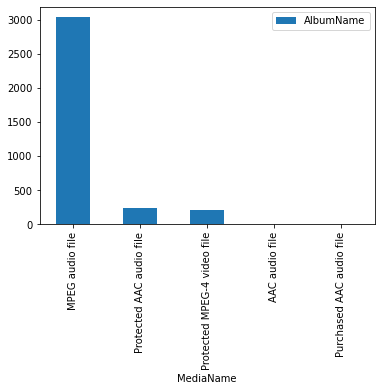

In [35]:
# code here
media_types = pd.read_sql_query("SELECT M.Name as MediaName, A.Title as AlbumName, G.Name as GenreName \
FROM tracks as T \
LEFT JOIN media_types as M ON M.MediaTypeId = T.MediaTypeId \
LEFT JOIN albums as A ON A.AlbumId = T.AlbumId \
LEFT JOIN genres as G ON G.GenreId = T.GenreId", conn)

med = media_types.pivot_table(index='MediaName',
                        values='AlbumName',
                        aggfunc='count').sort_values('AlbumName', ascending=False)
med.plot(kind='bar')




#

## Dive Deeper

1. Tampilkan 5 `BillingCountry` yang menghasilkan jumlah `Total` penjualan terbesar.


In [ ]:
# code here
pd.read_sql_query('select invoices.billingcountry as BillingCountry, \
                   sum(invoices.total) as Total\
                   from invoices\
                   group by BillingCountry\
                   order by Total desc\
                   limit 5', conn, index_col = 'BillingCountry')



#

2. Seorang `employee` dapat melayani beberapa `customer` dalam penjualan musik digital. Tampilkan banyaknya `customer` yang dilayani oleh masing-masing `employee`, kemudian siapakah nama lengkap `employee` yang melayani customer paling banyak?


In [1]:
# code here



#

3. Tampilkan semua record penjualan pada tabel `invoices` yang dilakukan oleh `employee` untuk `customer` yang berasal dari negara Brazil dan USA. Sertakan `InvoiceId`, `InvoiceDate`, nama lengkap `employee` dan `customer`, `BillingCountry`, `Total` kemudian simpan ke object `sales_BrazilUSA`. Identifikasi ada berapa transaksi yang terjadi?

In [ ]:
# code here



#